In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from mpl_toolkits import mplot3d

In [2]:
qc = QuantumCircuit(1) # circuito de 1 qbit
#probabilidad de colapsar a 0 = 0%, 
#probabilidad de colapsar a 1 = 100%
initial_state = [0,1] 
qc.initialize(initial_state)


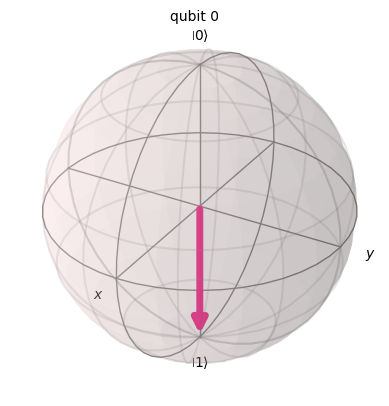

In [3]:
out = transpile(qc, Aer.get_backend('statevector_simulator'))
plot_bloch_multivector(out, reverse_bits=True)

In [4]:
# puerta not, invierte las probabilidades de colapsar
# | 0 1 | qbit_0
# | 1 0 | qbit_1
qc.x(0)

In [5]:
# puerta HADAMAT
# 1       | 1  1 | qbit_0
# sqrt(2) | 1 -1 | qbit_1
qc.h(0)

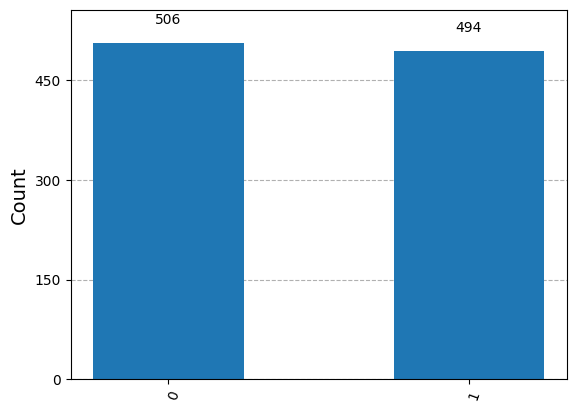

In [9]:
qc.measure_all() #cada vez que se ejecuta añade qbits
backend = Aer.get_backend('qasm_simulator')
result = backend.run(transpile(qc, Aer.get_backend('qasm_simulator')), shots = 1000).result()
plot_histogram(result.get_counts())

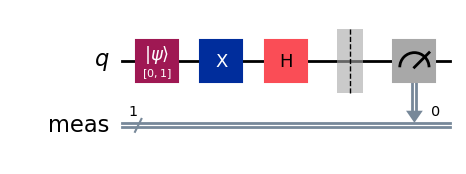

In [10]:
qc.draw(output='mpl')